<a href="https://colab.research.google.com/github/Asohail115/Airbnb-Booking_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Importing all Important Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Airbnb NYC 2019.csv")

**Exploring the dataset**

1.checking the shape of the dataframe that how many rows and columns it contains.

2.Checking the information of the dataset.

3.printing the head and sample of the datset.

4.checking the summary/describe of the dataset.

In [5]:
df.shape

(48895, 16)

The dataset contains 48895 rows and 16 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30662,23723855,Sunny Room in Townhouse near Central Park,28752891,Sarah,Manhattan,Upper West Side,40.79114,-73.96710,Private room,175,4,11,2019-06-27,0.77,2,63
31975,24961967,BEAUTIFUL LUX STUDIO -AMAZING ENTERTAINMENT SY...,104684975,Studio,Brooklyn,Canarsie,40.64361,-73.90435,Entire home/apt,140,1,1,2018-06-20,0.08,1,178
17256,13651334,Beautiful and huge room.,810050,Gladys,Manhattan,Harlem,40.82633,-73.94459,Private room,60,1,1,2016-07-09,0.03,1,157
7733,5851054,Serenity in the Heart of Brooklyn,26440049,Samantha,Brooklyn,Bushwick,40.70088,-73.91831,Private room,95,3,12,2017-12-10,0.25,1,0
10586,8141256,Beautiful Riverside Park Apartment,9835167,Abby,Manhattan,Upper West Side,40.78143,-73.98638,Entire home/apt,120,3,0,NaN,NaN,2,0


Summary of Numerical attributes.

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Handling the missing values**

Now checking for missing data

In [10]:
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Cleaning the data**

Here i am replacing NaN values of 'reviews_per_month' column with Zeros(0).

In [12]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [13]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Checking the rows having null value in name and host_name column.**

In [14]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,0.00,5,0


Here in this case We can see that 10 out of 16 of rows having NaN as name value have 0 reviews. so here i am just droping these rows.

In [15]:
df_airbnb=df[~df['name'].isnull()]

In [16]:
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


Here i am dropping those rows having null host_name value.

In [17]:

df_airbnb=df_airbnb[~df_airbnb['host_name'].isnull()]
df_airbnb.shape

(48858, 16)

Checking Neighbourhood Group Location and Room type location per Neighbourhood Group graphically.

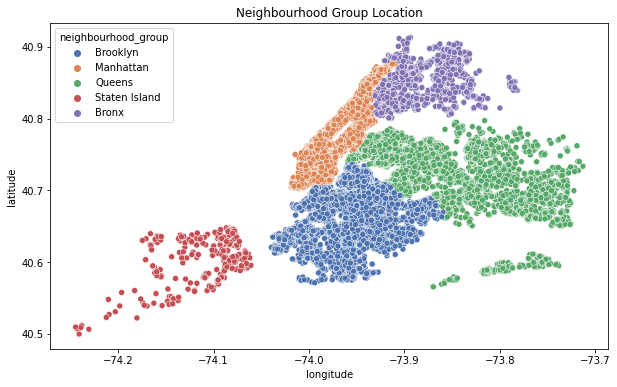

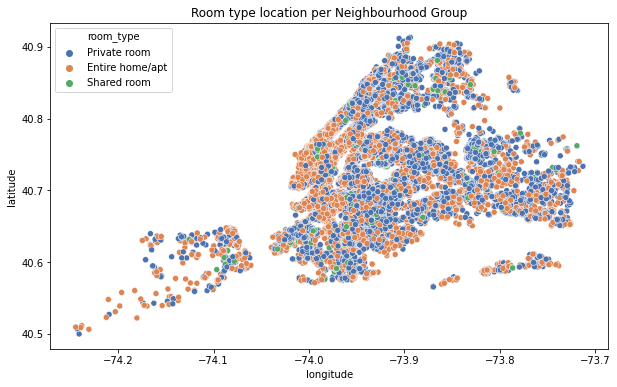

In [18]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group,palette="deep").set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type,palette="deep").set_title(title)
plt.ioff()

**Exploring the categorical columns**

Visualizing different locations.

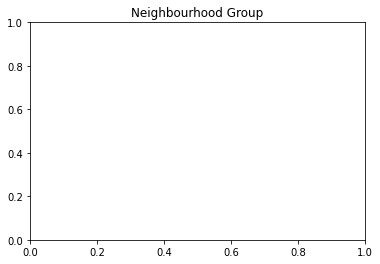

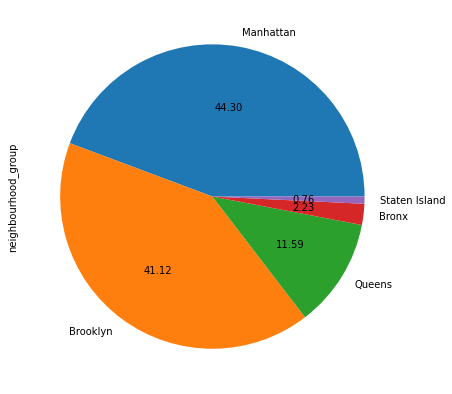

In [19]:
plt.title("Neighbourhood Group")
plt.figure(figsize=(10,7))
df["neighbourhood_group"].value_counts().plot(kind="pie",autopct="%.2f")

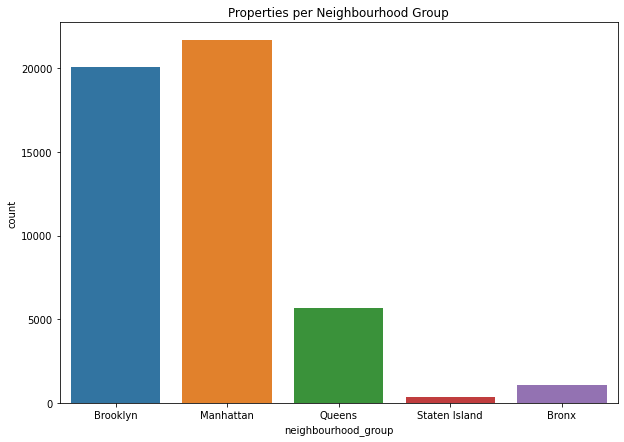

In [20]:
title = 'Properties per Neighbourhood Group'
plt.figure(figsize=(10,7))
sns.countplot(df['neighbourhood_group'])
plt.title(title)
plt.ioff()

According to the plot, Manhattan is the most demanded location followed by Brooklyn while Staten Island is the least in demand after the Bronx may be location might not be suitable.



**Visualizing different Room-Types**

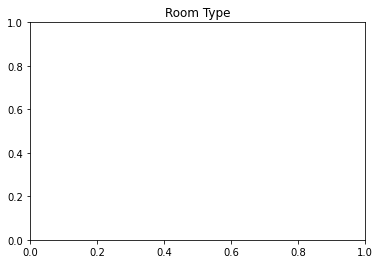

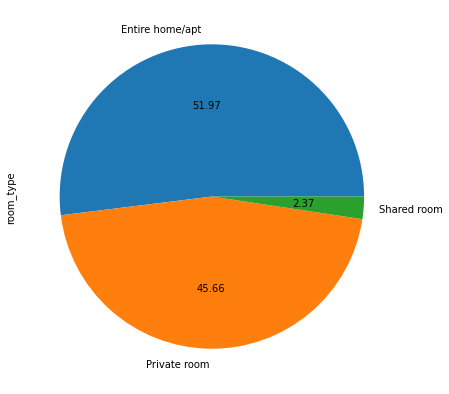

In [21]:
plt.title("Room Type")
plt.figure(figsize=(10,7))
df["room_type"].value_counts().plot(kind="pie",autopct="%.2f")

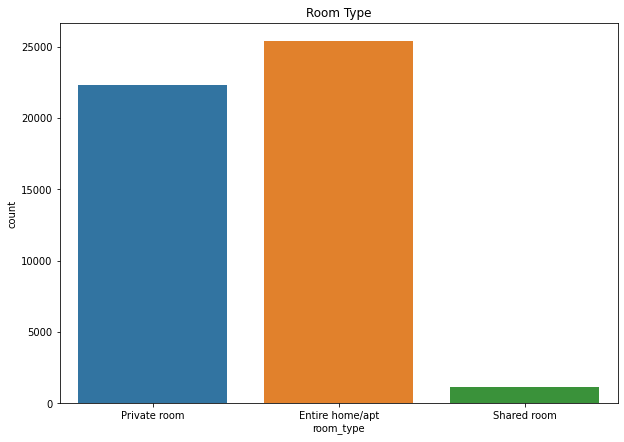

In [22]:
title = "Room Type"
plt.figure(figsize=(10,7))
sns.countplot(df['room_type'])
plt.title(title)
plt.ioff()

**Conclusion**

Among the different room types available, the most demanded ones are entire-homes/apt than private rooms, and lastly shared rooms.


People are mostly preferring entire home/apt or private rooms and the least people are preferring shared rooms just because of having privacy and comfort.



**Visualizing different room-types according to different locations.**

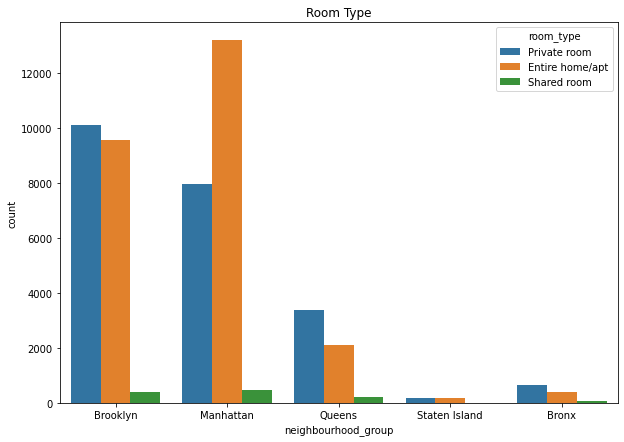

In [23]:
title = "Room Type"
plt.figure(figsize=(10,7))
sns.countplot(x='neighbourhood_group', hue="room_type", data=df)
plt.title(title)
plt.ioff()

**Conclusion**

In Manhattan people are mostly prefering Entire-home/apt.

From above graph we can see that Brooklyn is somewhat similar to Manhattan.

For Staten island there are minimum number of listings.

**Visualizing top 10 hosts and finding the reason behind it.**

In [24]:
df_busiest_host = df.groupby(["host_name","room_type"])["number_of_reviews"].max().reset_index()
df_busiest_host = df_busiest_host.sort_values(by="number_of_reviews",ascending=False).head(10)
df_busiest_host

,host_name,room_type,number_of_reviews
3434,Dona,Private room,629
6333,Jj,Private room,607
8978,Maya,Private room,543
2164,Carol,Private room,540
2975,Danielle,Private room,510
1214,Asa,Entire home/apt,488
13841,Wanda,Private room,480
7903,Linda,Private room,474
2947,Dani,Entire home/apt,467
863,Angela,Private room,466


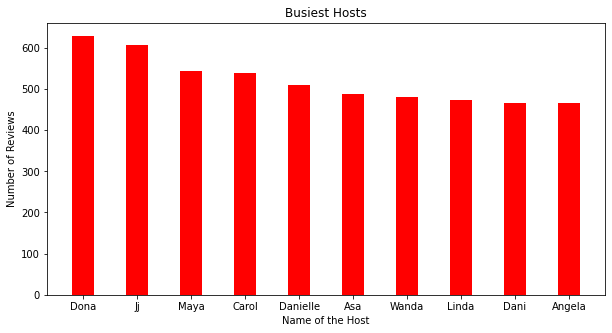

In [25]:
df_host_name = df_busiest_host['host_name']
df_reviews = df_busiest_host['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_host_name, df_reviews, color ='red',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

**Top 5 Busiest hosts are:**

Dona,Ji,Maya,Carol and Danielle

Because these hosts listed room type as Entire home and Private room which is having most_number_of_reviews.


**plotting the top 20 preferred area per number_of_reviews**

In [27]:
df_neighbourhood_reviews = df.groupby(["neighbourhood","room_type"])["number_of_reviews"].max().reset_index()
df_neighbourhood_reviews = df_neighbourhood_reviews.sort_values(by="number_of_reviews",ascending=False).head(20)
df_neighbourhood_reviews

,neighbourhood,room_type,number_of_reviews
258,Jamaica,Private room,629
234,Harlem,Private room,607
144,East Elmhurst,Private room,543
294,Lower East Side,Private room,540
366,Park Slope,Entire home/apt,488
68,Bushwick,Private room,480
191,Flushing,Private room,474
445,South Slope,Entire home/apt,467
259,Jamaica,Shared room,454
158,East Village,Private room,451


Text(0, 0.5, 'number of reviews')

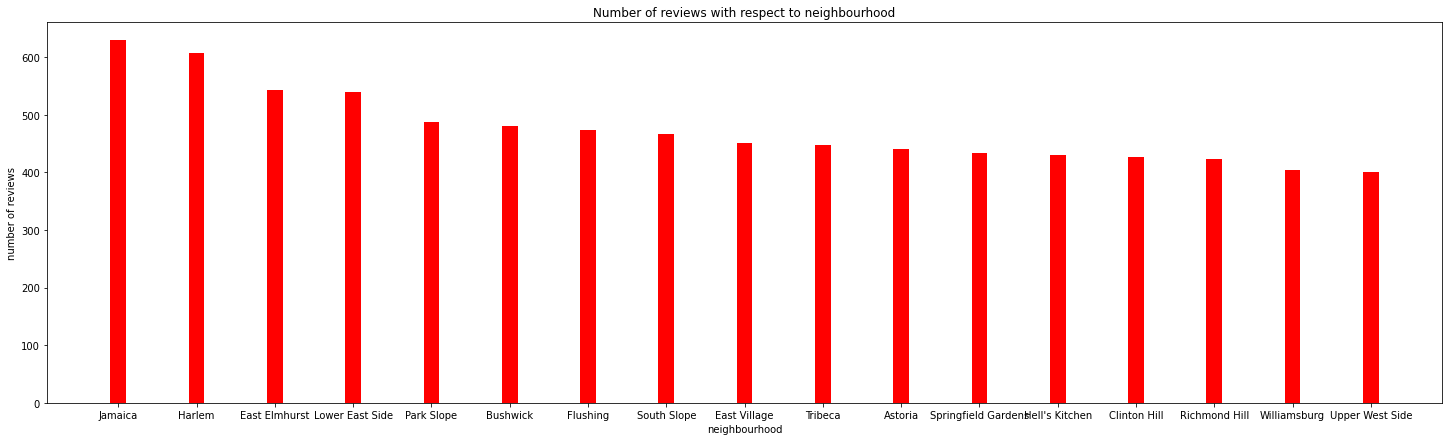

In [28]:
x = df_neighbourhood_reviews["neighbourhood"]
y = df_neighbourhood_reviews["number_of_reviews"]
plt.figure(figsize=(25,7))
plt.bar(x,y,color="red",width=0.2)
plt.title("Number of reviews with respect to neighbourhood")
plt.xlabel("neighbourhood")
plt.ylabel("number of reviews")

Top five neighbourhood on the basis of number of reviews are:

Jamaica

Harlem

East Elmhurst

Lower east side

Park slope


**Analysis on availability_365 column**

In [29]:
crowded_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
crowded_areas = crowded_areas.sort_values(by='minimum_nights', ascending=False)
crowded_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


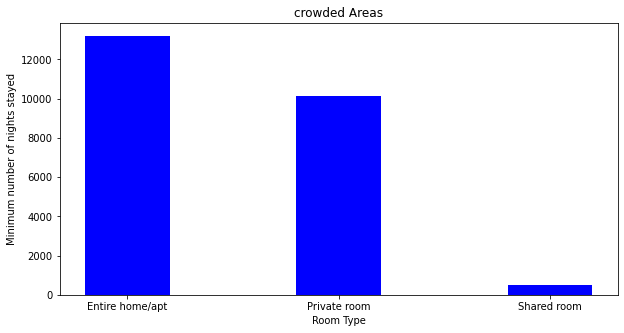

In [30]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(crowded_areas["room_type"],crowded_areas["minimum_nights"], color ='blue',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("crowded Areas")
plt.show()

**Here We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are actually less in price.**

## Analysis of price

#summary of descriptive statistics

In [32]:
#summary of descriptive statistics
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

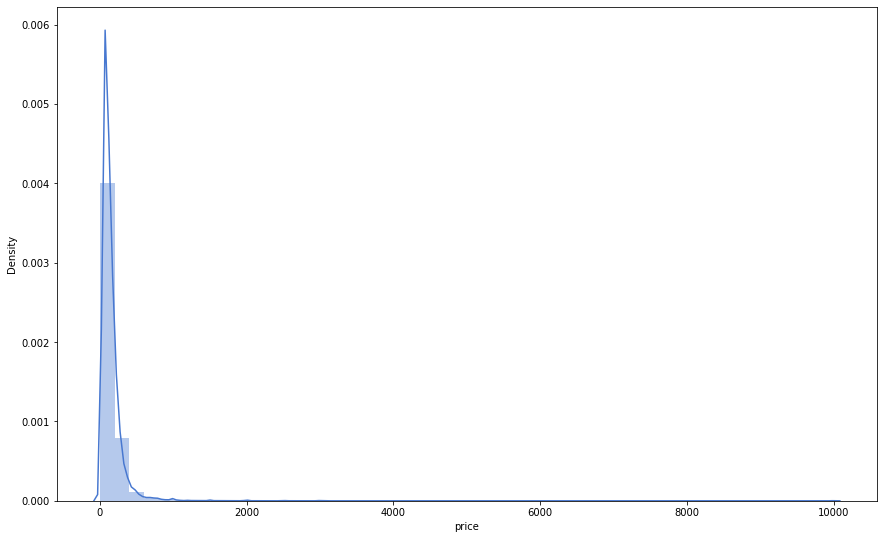

In [39]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(50, 20))

subplot(2,3,2)
sns.distplot(df['price'])


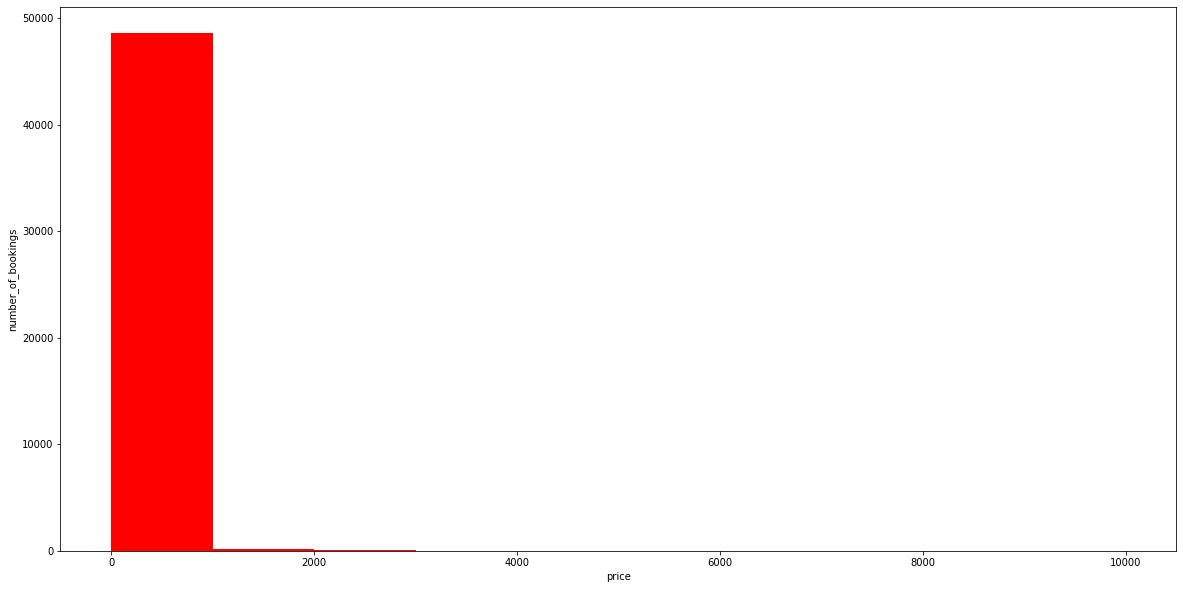

In [41]:
plt.hist(df.price, color='red')
plt.xlabel('price')
plt.ylabel('number_of_bookings')
plt.rcParams['figure.figsize'] = (10, 5)

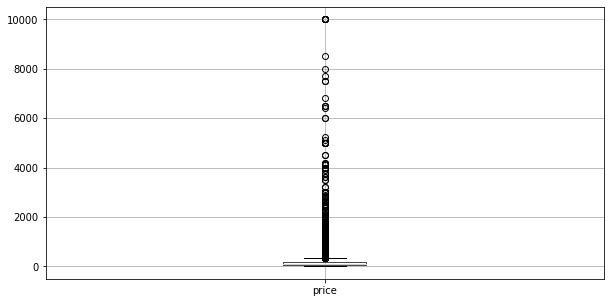

In [42]:
df.boxplot(column=['price'])
plt.show()
plt.rcParams['figure.figsize'] = (20, 10)

In [43]:
df.sort_values('price',ascending=False,ignore_index=True).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
1,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
2,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83
3,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,0.00,1,365
4,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83


### from the above analysis we can say that 0 and 10000 are outliers here in the price value.

**Plotting the Correlation Matrix**

In [ ]:
corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00,0.59,-0.00,0.09,0.01,-0.01,-0.32,0.18,0.13,0.09
host_id,0.59,1.00,0.02,0.13,0.02,-0.02,-0.14,0.21,0.15,0.20
latitude,-0.00,0.02,1.00,0.08,0.03,0.02,-0.02,-0.02,0.02,-0.01
longitude,0.09,0.13,0.08,1.00,-0.15,-0.06,0.06,0.14,-0.11,0.08
price,0.01,0.02,0.03,-0.15,1.00,0.04,-0.05,-0.05,0.06,0.08
minimum_nights,-0.01,-0.02,0.02,-0.06,0.04,1.00,-0.08,-0.12,0.13,0.14
number_of_reviews,-0.32,-0.14,-0.02,0.06,-0.05,-0.08,1.00,0.59,-0.07,0.17
reviews_per_month,0.18,0.21,-0.02,0.14,-0.05,-0.12,0.59,1.00,-0.05,0.16
calculated_host_listings_count,0.13,0.15,0.02,-0.11,0.06,0.13,-0.07,-0.05,1.00,0.23
availability_365,0.09,0.20,-0.01,0.08,0.08,0.14,0.17,0.16,0.23,1.00


# Conclusion:
